In [1]:
import pyomo.environ as pyo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
t1 = hydro_opt()

In [3]:
t1_opt = t1.optimize(return_model=True, return_as_df=True)

In [4]:
t1_opt

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,NH3 Schiff,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import
Land,,,,,,,,,,,,,,,,,
DZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


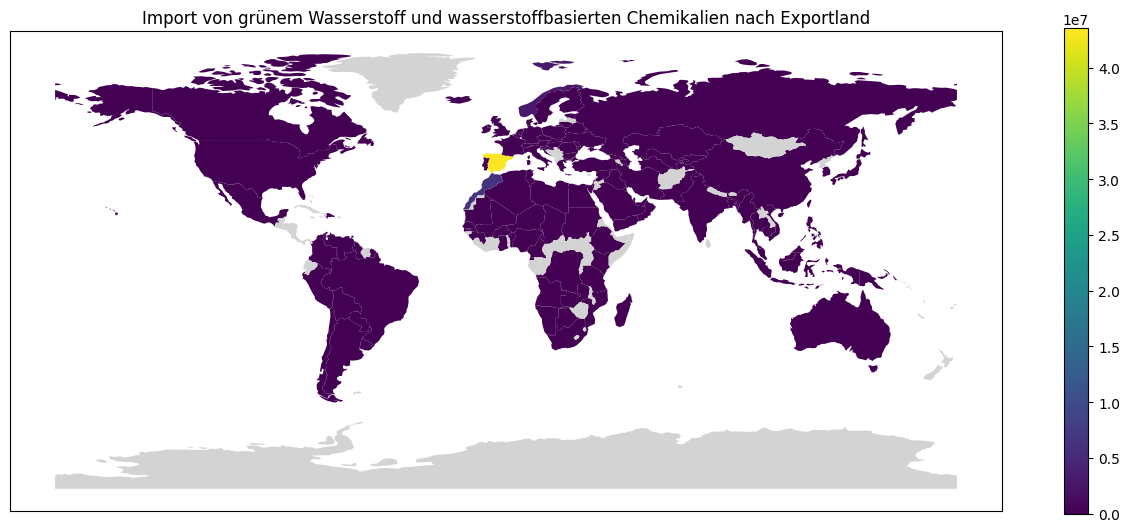

In [5]:
t1.visualize()

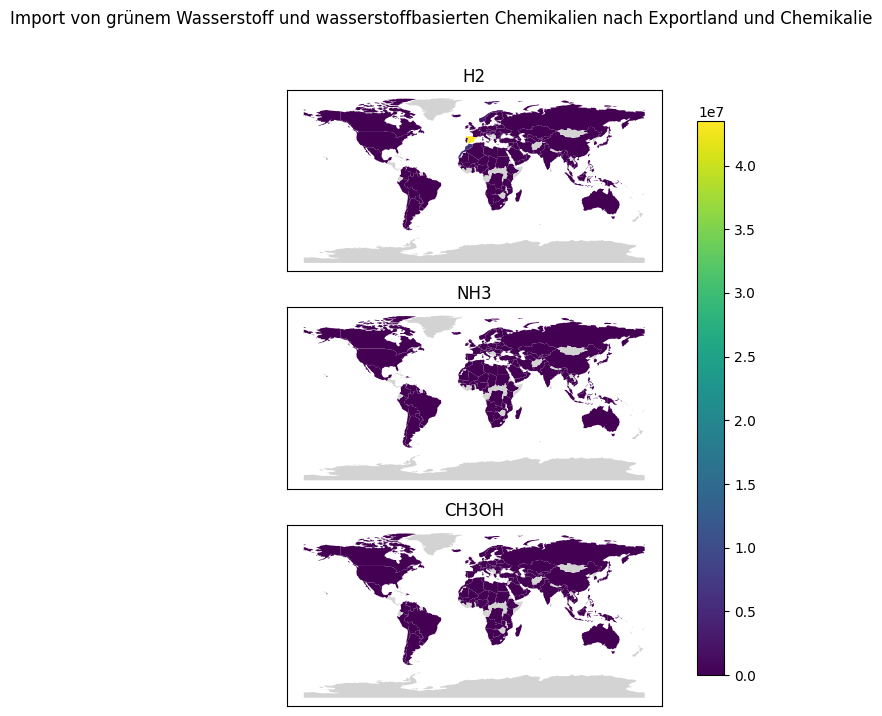

In [6]:
t1.visualize(what="commodities", figsize=(9,8))

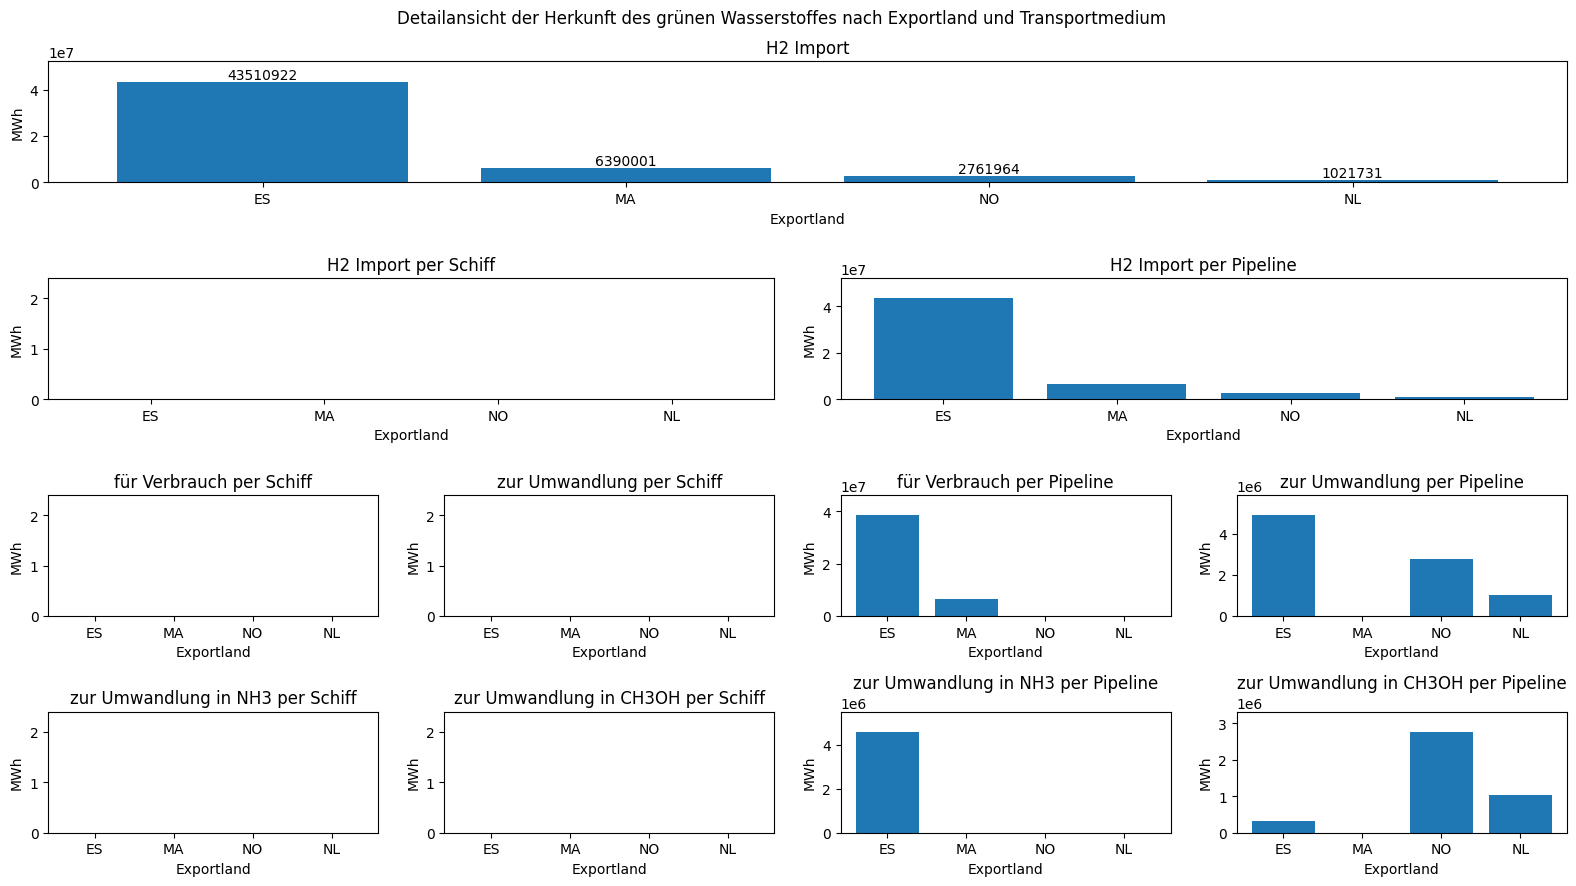

In [7]:
t1.visualize(what="hydrogen_conversion", vis_style="bar")

In [8]:
t2 = hydro_opt(use_transport_limits=True, de_co2_price=2222)

In [9]:
t2_opt = t2.optimize()

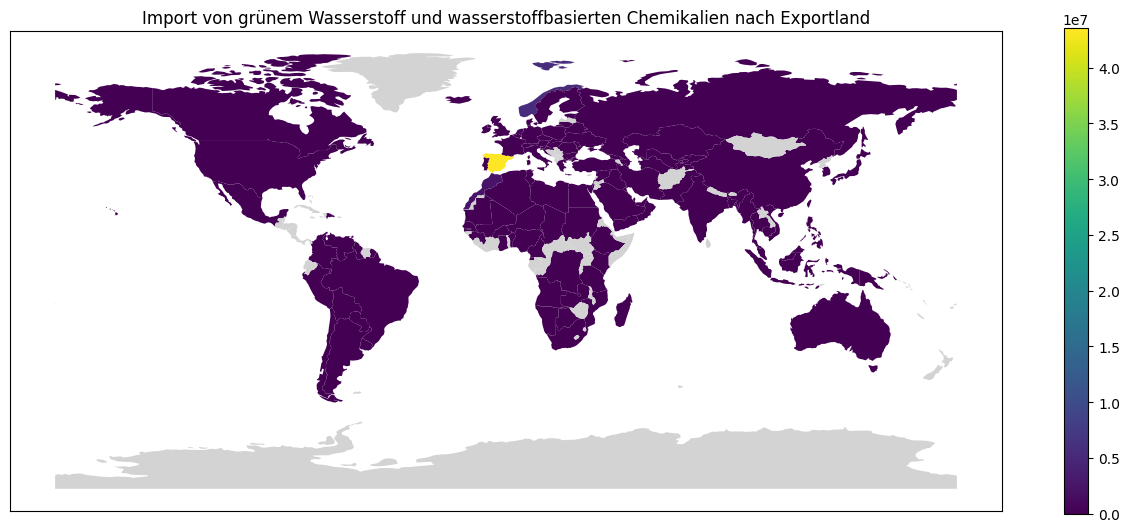

In [10]:
t2.visualize()

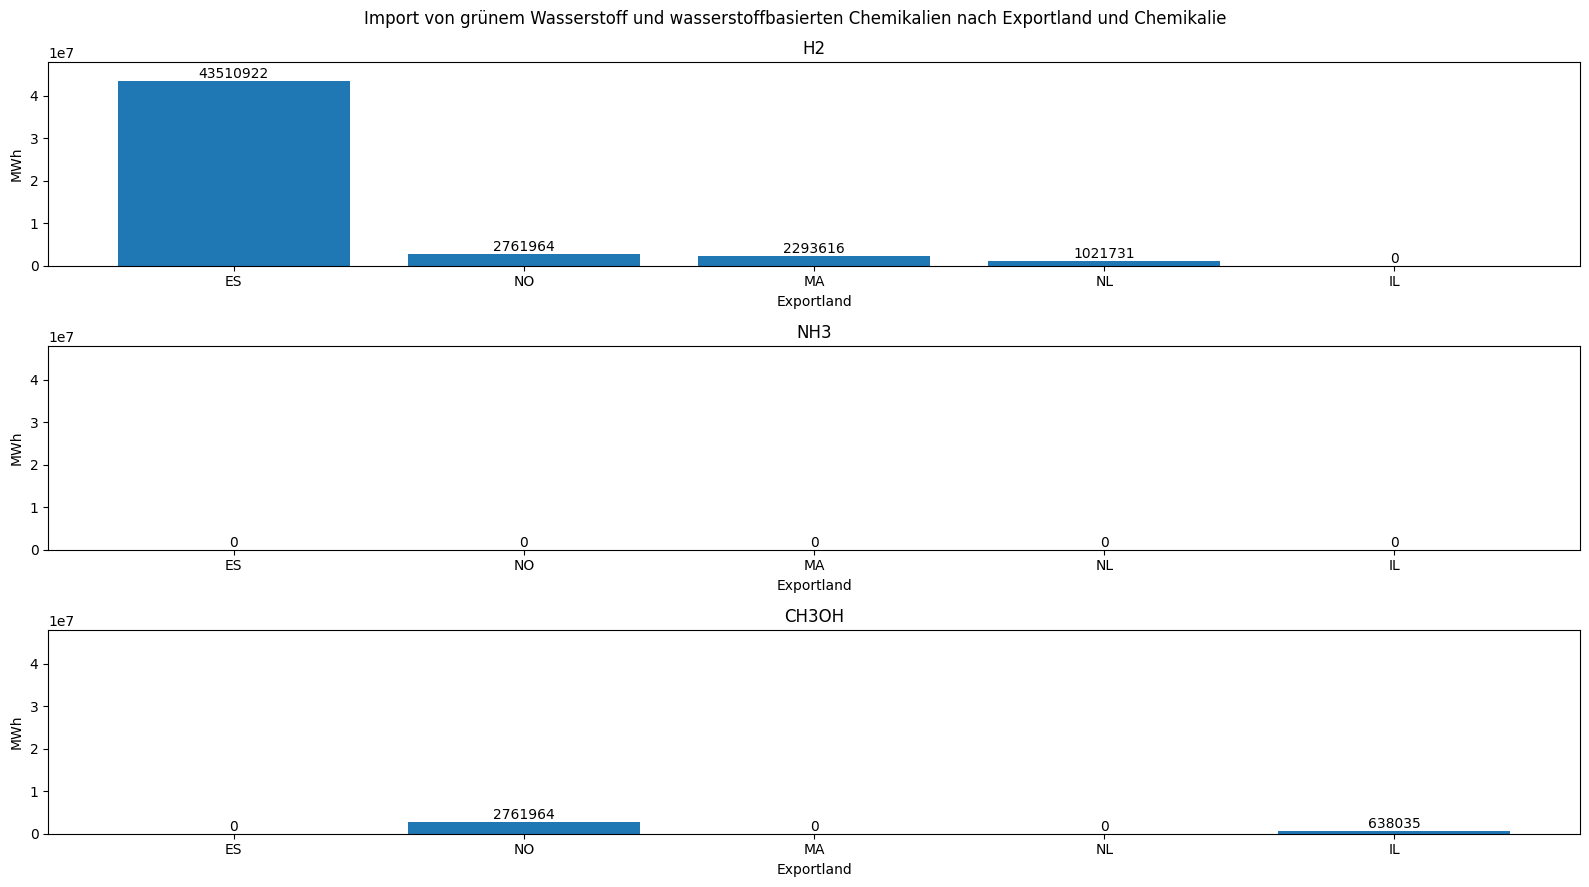

In [11]:
t2.visualize(what = "commodities", vis_style = "bar")

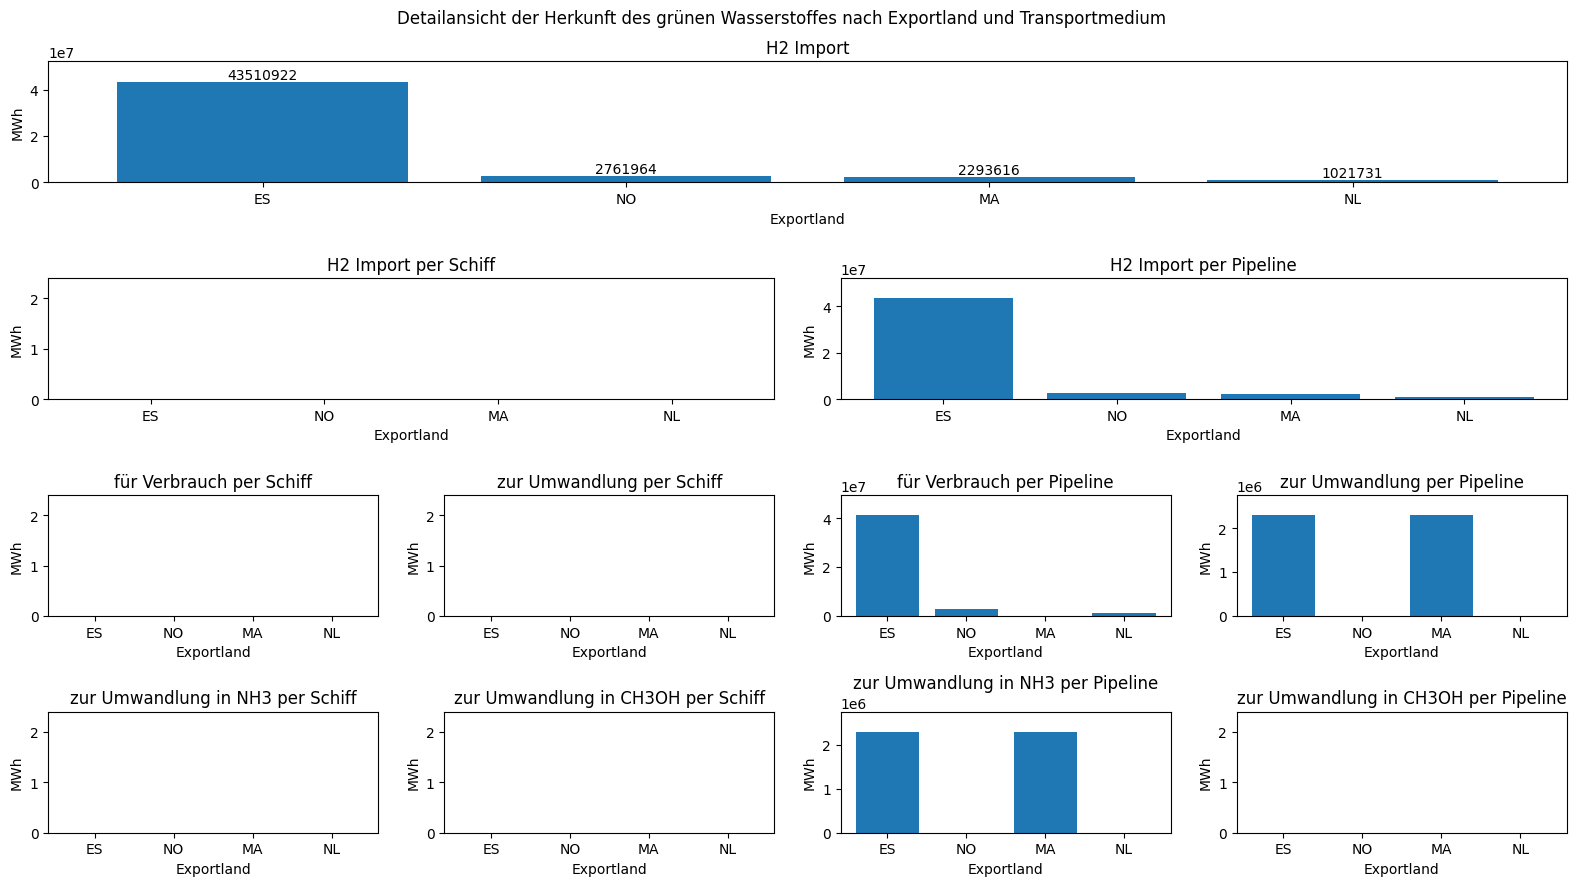

In [12]:
t2.visualize(what="hydrogen_conversion", vis_style="bar")